### Predicting Car Prices with Deep Learning / Artificial Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('car_purchasing.csv',encoding='latin-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
df.drop(['customer name','customer e-mail','country'],axis=1,inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
x=df.drop('car purchase amount',axis=1)
y=df['car purchase amount']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.80,random_state=42)

In [10]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(loss="mse",optimizer='adam')

In [11]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
4/4 [==============================] - 1s 84ms/step - loss: 610396032.0000 - val_loss: 121012504.0000
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 173194896.0000 - val_loss: 236707424.0000
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 264018752.0000 - val_loss: 126564608.0000
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 133993296.0000 - val_loss: 114691952.0000
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 121822048.0000 - val_loss: 125638752.0000
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 113234024.0000 - val_loss: 96495008.0000
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 105336800.0000 - val_loss: 94486576.0000
Epoch 8/10
4/4 [==============================] - 0s 16ms/step - loss: 104642848.0000 - val_loss: 86683608.0000
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 90567912.0000 - val_loss: 91

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                114       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(x,y)

16/16 [==============================] - 0s 2ms/step - loss: 79314280.0000


79314280.0

In [14]:
tahmin=model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(tahmin,y_test)

0.166171724210325

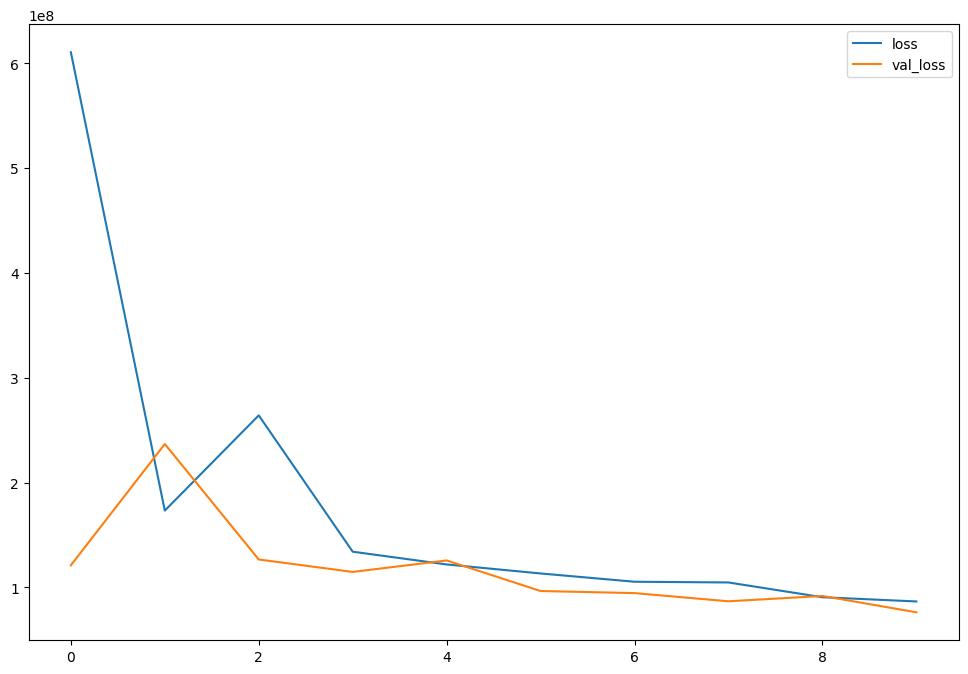

In [17]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8));

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
(mean_squared_error(y_test,tahmin))**0.5

8729.424239363427

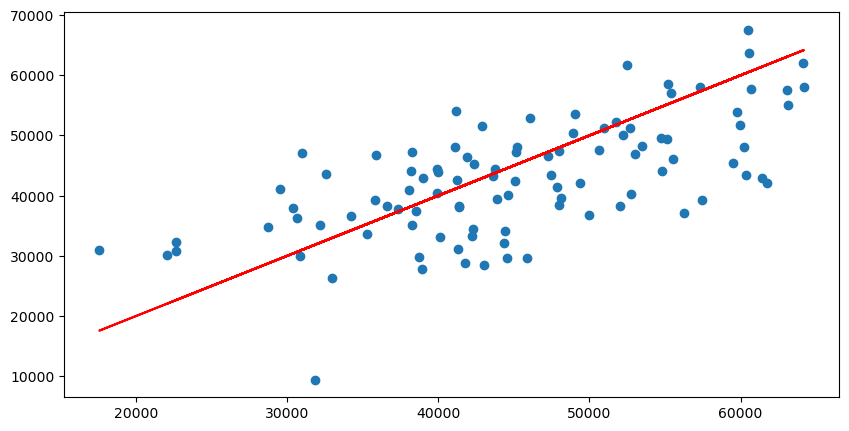

In [20]:
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,'r');